In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [127]:
def load() -> pd.DataFrame:
    df = pd.read_pickle("data.pickle")

    outsample = df[df["Date Announced"] > "2020-01-01"] # true out of sample, do not touch
    insample = df[df["Date Announced"] <= "2020-01-01"]

    return outsample, insample 

_, df = load()

In [128]:
df.head()

,Date Announced,Date Effective,Date Withdrawn,Deal Number,Target Name,Target Ticker Symbol,Target CUSIP,Target Industry Sector,Acquiror Name,Acquiror Ticker Symbol,Acquiror CUSIP,Acquiror Industry Sector,% sought,Value of Transaction ($mil),Enterprise Value ($mil),Equity Value ($mil),Ratio of Offer Price to EPS,"Target and Acquiror Financial Advisor Fees, Total ($mil)",Target Share Price 1 Day Prior to Announcement ($),Ratio of Deal Value to Sales,% seeking to own after trans- action,Equity Value at Announcement ($mil),Target Net Sales LTM ($mil),EBIT Last Twelve Months ($ Mil),Pre-tax Income Last Twelve Months ($ Mil),Net Income Last Twelve Months ($ Mil),Target Net Assets ($mil),Target Total Assets ($mil),Target EBITDA LTM ($mil),Net Debt ($ mil),Target Book Value Per Share LTM (US$),Target Common Equity ($mil),Target Earnings Per Share LTM (US$),Target R&D One Year Prior ($ mil),Target Debt Ratio,Target Debt Ratio Two Years Prior,Price / Net Assets Per Share,Share- holders Equity/ Total Assets,Target Return On Assets LTM,Return On Total Equity,Target Return On Equity LTM,Target Return On Equity One Year Prior,Target Debt/ Capital.,Target Long- Term Debt/ Share- holders Equity,Long Term Debt/ Total Assets,Firm Value/ EBIT,Firm Value/ EBITDA,Firm Value/ Sales,Implied Value/ Target Common Equity,Firm Value/ Assets- Cash,Equity Value/ Common Equity,Value / Net Assets,Common Equity Multiple,Ratio of Deal Value to EBIT,Ratio of Deal Value to EBITDA,Ratio of Deal Value to Net Income,Ratio of Enterprise Value to Sales,Ratio of Enterprise Value to EBIT,Ratio of Enterprise Value to EBITDA,Ratio of Enterprise Value to Net Income,Equity Value/ Net Sales,Ratio of Equity Value to EBIT,Ratio of Equity Value at Announcement to EBITDA,Ratio of Equity Value to Net Income,Acquiror Cvt Debt LTM ($ mil),Acquiror Curr Assets LTM ($ mil),Acquiror Curr Liabilities LTM ($ mil),Acquiror Common Equity LTM ($ mil),Acquiror Earnings Per Share LTM ($),Acquiror EBIT LTM ($ mil),Acquiror EBITDA LTM ($ mil),Acquiror Net Assets ($mil),Acquiror Net Debt LTM ($ mil),Acquiror Net Income Last Twelve Months ($Mil),Acquiror Net Sales ($mil),Target Closing Price 1 Day After Ann Date ($),S&P 500 Closing Price 1 Day After Announcement,S&P 500 Closing Price 1 Day Before Announcement,Price Per Share,Acquiror Closing Price 90 Days After Ann Date ($),Target Closing Price 90 Days After Ann Date ($),Target Share Price 1 Week Prior to Announcement ($),Target Share Price 4 Weeks Prior to Announcement ($),Premium 1 day prior to announce- ment date,Premium 1 week prior to announce- ment date,Premium 4 weeks prior to ann. date,Acquiror is public,Success
0,2012-01-04,2012-04-02,NaT,2377121020,Ascent Solar Technologies Inc,ASTI\nASTI,043635,Electronic and Electrical Equipment,TFG Radiant Invest Grp Ltd,NaN,85985Y,"Investment & Commodity Firms,Dealers,Exchanges",21.0,4.000,2.825,19.477,NaN,NaN,0.42,5.167,21.0,19.477,3.950,-27.302,-105.7,-105.7,50.0,61.4,-19.760,-16.652,127087477.0,50.003,-3.020000e+08,16.6,0.2,0.1,0.4,81.41,-172.20,NaN,NaN,-211.50,0.12,0.13,10.77,NaN,NaN,0.72,0.390,0.08,0.390,0.4,0.408,NaN,NaN,NaN,0.715,NaN,NaN,NaN,4.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,1281.06,1277.06,0.5,NaN,0.63,0.452,0.665,19.05,10.62,-24.81,False,True
1,2012-01-07,2012-02-13,NaT,2377834020,Inhibitex Inc,INHX,45719T,Drugs,Bristol-Myers Squibb Co,BMY\nBMY\nBMYB34\nBMYMP,110122,Drugs,100.0,2523.868,2471.397,2523.698,NaN,21.5,9.87,1187.703,100.0,2523.868,2.125,-25.608,-25.1,-25.1,49.4,55.9,-24.984,-52.301,0.6,49.378,-3.700000e-01,21.0,0.1,0.1,41.2,88.27,-44.78,NaN,NaN,-163.80,0.00,0.00,0.22,NaN,NaN,1163.01,51.670,759.96,51.110,51.1,51.113,NaN,NaN,NaN,1163.010,NaN,NaN,NaN,1187.623,NaN,NaN,NaN,NaN,15318.00,7780.00,15956.00,2.160,6986.00,7787.00,15867.0,-3242.00,3701.0,21244.0,23.70,1280.70,1277.81,26.0,33.04,NaN,NaN,14.640,163.42,NaN,77.60,True,True
3,2012-01-13,NaT,2012-05-04,2379612020,Georgia Gulf Corp,GGC,373200,Chemicals and Allied Products,Westlake Chemical Corp,W

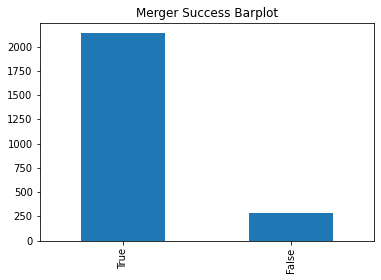

In [129]:
df["Success"].value_counts().plot.bar(title="Merger Success Barplot")
plt.show()

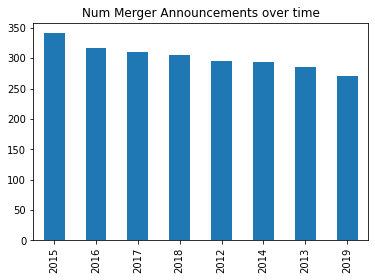

In [130]:
df["Date Announced"].dt.year.value_counts().plot.bar(title="Num Merger Announcements over time")
plt.show()

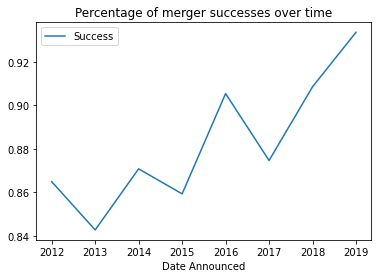

In [131]:
probability_success_by_year = pd.pivot_table(df, values="Success", index=df["Date Announced"].dt.year, aggfunc=np.mean)
probability_success_by_year.plot(title="Percentage of merger successes over time")
plt.show()

In [132]:
df.groupby("Acquiror is public")["Success"].agg([np.mean]).rename(columns={"mean":"Success"})

,Success
Acquiror is public,
False,0.857143
True,0.896461


In [133]:
success_by_industry = pd.pivot_table(df, values="Success", index="Target Industry Sector", aggfunc=np.mean)
industry_compare = pd.merge(success_by_industry, df.groupby("Target Industry Sector").size().rename("Sample Size"), how="left", on="Target Industry Sector")
industry_compare = industry_compare.sort_values(by="Success", ascending=False)

industry_compare[industry_compare["Sample Size"] > 30]

,Success,Sample Size
Target Industry Sector,,
"Commercial Banks, Bank Holding Companies",0.969925,399
Health Services,0.925000,40
Prepackaged Software,0.918033,122
"Savings and Loans, Mutual Savings Banks",0.907692,65
Business Services,0.905263,190
Machinery,0.904762,42
"Electric, Gas, and Water Distribution",0.894737,95
Food and Kindred Products,0.894737,38
"Measuring, Medical, Photo Equipment; Clocks",0.888889,108


In [134]:
df.corr()["Success"].sort_values(ascending=False) # normalise data first before doing this

Success                                            1.000000
Acquiror Cvt Debt LTM ($ mil)                      0.259156
S&P 500 Closing Price 1 Day Before Announcement    0.081226
S&P 500 Closing Price 1 Day After Announcement     0.080387
Deal Number                                        0.079335
                                                     ...   
Value of Transaction ($mil)                       -0.121255
Equity Value ($mil)                               -0.122206
Target Net Sales LTM ($mil)                       -0.123476
Equity Value at Announcement ($mil)               -0.125766
Enterprise Value ($mil)                           -0.133316
Name: Success, Length: 77, dtype: float64

In [175]:
df["Pct 1d Premium"] = (df["Target Closing Price 1 Day After Ann Date ($)"] / df["Target Share Price 1 Day Prior to Announcement ($)"]) - 1

pd.merge(df["Success"], df["Pct 1d Premium"].replace([np.inf, -np.inf], np.nan).dropna(), how="left", left_index=True, right_index=True).corr()

,Success,Pct 1d Premium
Success,1.000000,0.049314
Pct 1d Premium,0.049314,1.000000
